In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os

report = pd.read_csv(r"/Users/ranishah/Documents/summerProjs/2015.csv")
report.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [2]:
report.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [3]:
report['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [4]:
rows_list=[]
for region in report['Region'].unique():
    happinessRankSum = report.loc[report['Region'] == region]['Happiness Rank'].sum()
    numCountriesInRegion = len(report.loc[report['Region'] == region])
    avgHappinessScorePerRegion = happinessRankSum/numCountriesInRegion;
    dict1 = {'Region': region, 'Happiness Rank Per Region': avgHappinessScorePerRegion, 'numCountriesInRegion': numCountriesInRegion};
    rows_list.append(dict1)

In [5]:
df = pd.DataFrame(rows_list)
df.sort_values(['Happiness Rank Per Region'], ascending=True, inplace=True)
df

,Region,Happiness Rank Per Region,numCountriesInRegion
2,Australia and New Zealand,9.500000,2
1,North America,10.000000,2
0,Western Europe,29.523810,21
4,Latin America and Caribbean,46.909091,22
7,Eastern Asia,64.500000,6
3,Middle East and Northern Africa,77.600000,20
6,Central and Eastern Europe,79.000000,29
5,Southeastern Asia,81.222222,9
9,Southern Asia,113.142857,7
8,Sub-Saharan Africa,127.900000,40


/Users/ranishah/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Australia and New Zealand'),
 Text(1, 0, 'North America'),
 Text(2, 0, 'Western Europe'),
 Text(3, 0, 'Latin America and Caribbean'),
 Text(4, 0, 'Eastern Asia'),
 Text(5, 0, 'Middle East and Northern Africa'),
 Text(6, 0, 'Central and Eastern Europe'),
 Text(7, 0, 'Southeastern Asia'),
 Text(8, 0, 'Southern Asia'),
 Text(9, 0, 'Sub-Saharan Africa')]

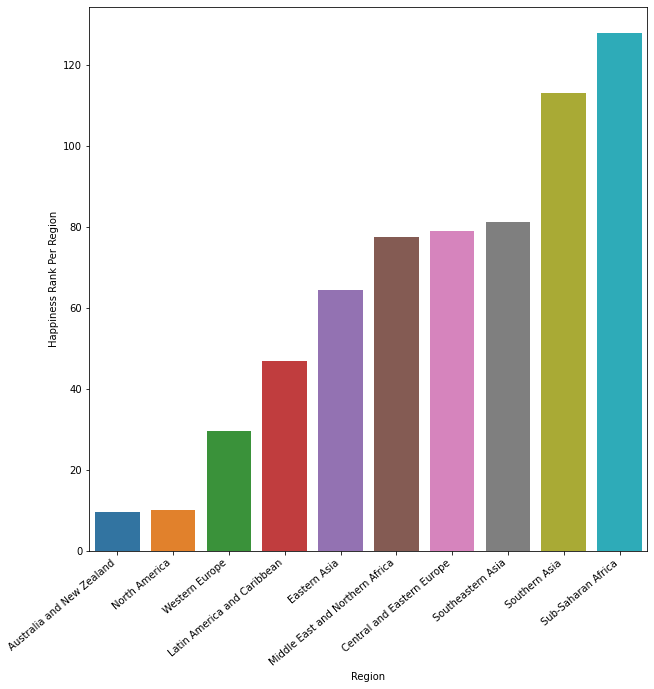

In [6]:
plt.figure(figsize=(10,10))
ax = sns.barplot(df['Region'], df['Happiness Rank Per Region'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")